<a href="https://colab.research.google.com/github/59822/prob_parcial/blob/main/parcial_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribucion normal


In [19]:
import numpy as np
import scipy.stats as stats

In [52]:
media = float(input("Escriba la media: "))
desv = float(input("Escriba la desviacion: "))
x = float(input("Escriba el valor que va a tomar X, o que sea menor a ese valor: "))




Escriba la media: 5
Escriba la desviacion: 0.1
Escriba el valor que va a tomar X, o que sea menor a ese valor: 2


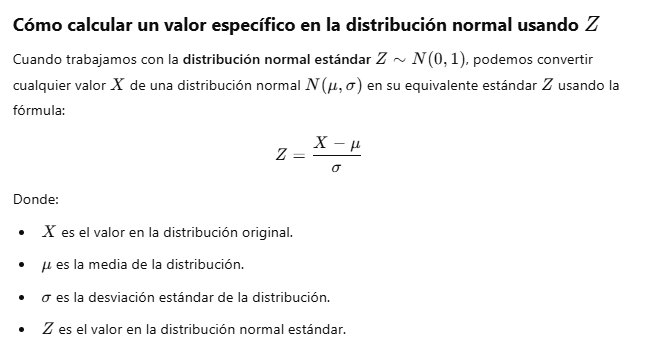

In [27]:
# X = a, que tome un valor especifico
prob_esp = stats.norm.pdf(x, loc = media, scale= desv)
print(f"La probabilidad de que tome {x} valor especifico es: {round(prob_esp*100,2)}")

La probabilidad de que tome 35.0 valor especifico es: 4.8


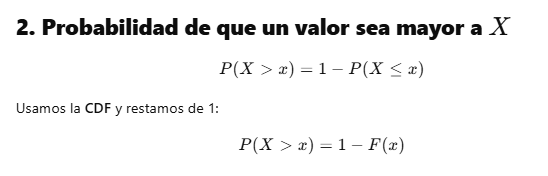

In [45]:
# X > a
probabilidad_mayor = 1 - stats.norm.cdf(x, loc=media, scale=desv)
print("Probabilidad de que la variable sea mayor que", x, ":", round(probabilidad_mayor*100,2))

Probabilidad de que la variable sea mayor que 34.5 : 16.29


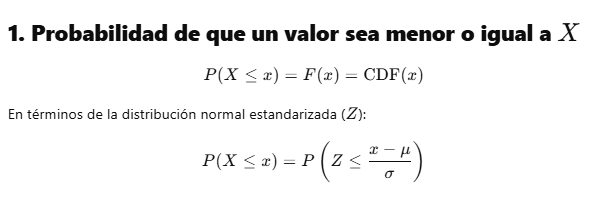![image.png](
)

In [40]:
# X <= a, tome un valor menor o igual a

prob_men_ig = stats.norm.cdf(x, loc=media, scale=desv)
print(f"La probabilidad de que tome menor o igual {x}  es: {round(prob_men_ig*100,2)}")

La probabilidad de que tome menor o igual 1.09  es: 0.0


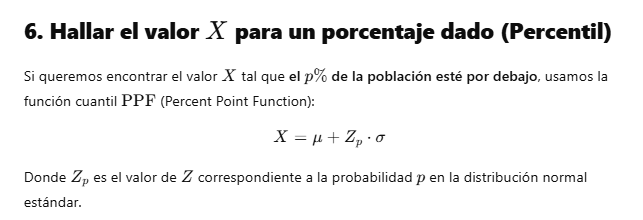

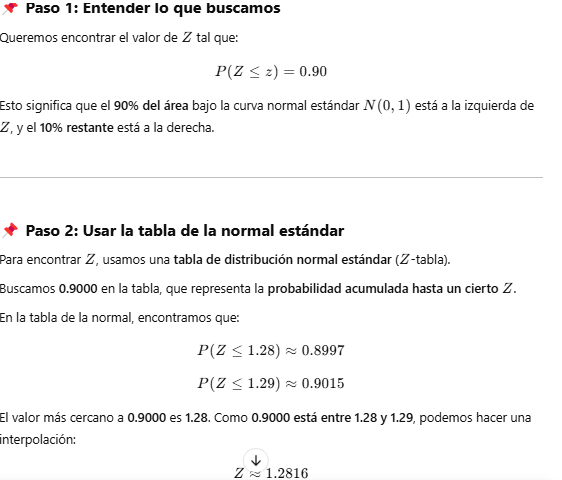

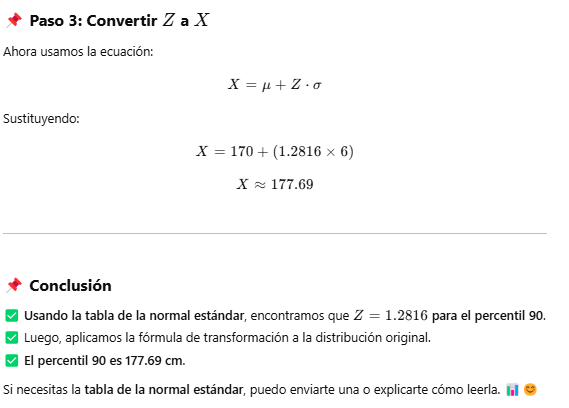

In [17]:
# Calcular el percentil
percentil = float(input("Escriba el percentil a calcular: "))
valor = stats.norm.ppf(percentil, loc=media, scale=desv)

print("El valor correspondiente al percentil", percentil * 100, "es:", round(valor,2))
print(f"Reprensentando que en el percentil {percentil} o en el pocentaje {percentil*100}\n Hay personas de menos de este valor {round(valor,2)}  ")

KeyboardInterrupt: Interrupted by user

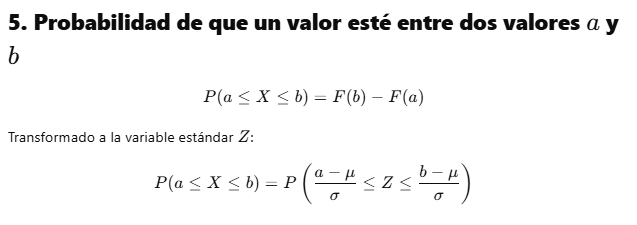

In [53]:
# Entre intervalos
limite_inferior = float(input("Ingrese el limite inferior del intervalo: "))
limite_superior = float(input("Ingrese el limite superior del intervalo: "))
probabilidad_intervalo = stats.norm.cdf(limite_superior, loc=media, scale=desv) - stats.norm.cdf(limite_inferior, loc=media, scale=desv)

print("Probabilidad de que la variable esté entre", limite_inferior, "y", limite_superior, ":", round(probabilidad_intervalo,2))


Ingrese el limite inferior del intervalo: 4.85
Ingrese el limite superior del intervalo: 5.15
Probabilidad de que la variable esté entre 4.85 y 5.15 : 0.87


# TLC:
Si sumamos muchas variables aleatorias independientes, la distribución de su suma (o su media) se aproximará a una distribución normal, sin importar la distribución original.

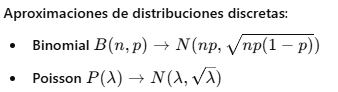

## 1. Binomial

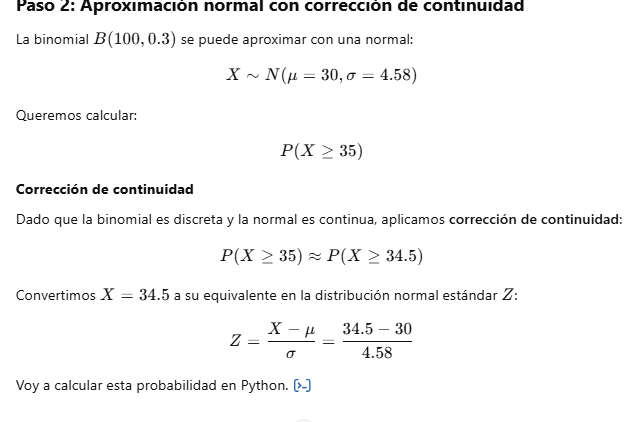

In [24]:
# Pasar media a normal
import math

# Solicitar la media de la distribución binomial (n*p)
n = int(input("Ingrese el número de ensayos (n) de la distribución binomial: "))
p = float(input("Ingrese la probabilidad de éxito (p) en cada ensayo: "))
media_binomial = n * p

desv_binomial = math.sqrt(n * p * (1 - p))



print(f"La distribución normal equivalente es: N({media_binomial}, {desv_binomial**2})")

print(f"σ es {round(desv_binomial,2)}")

Ingrese el número de ensayos (n) de la distribución binomial: 100
Ingrese la probabilidad de éxito (p) en cada ensayo: 0.3
La distribución normal equivalente es: N(30.0, 21.0)
σ es 4.58


In [38]:
x_binomial = float(input("Escriba x que va a ser cambiado a normal desde binomial: "))
x_corrected = (x_binomial-media_binomial)/desv_binomial

print("X cambiado a su equivalente en distribución normal es : ", round(x_corrected,2))

Escriba x que va a ser cambiado a normal desde binomial: 35
X cambiado a su equivalente en distribución normal es :  1.09


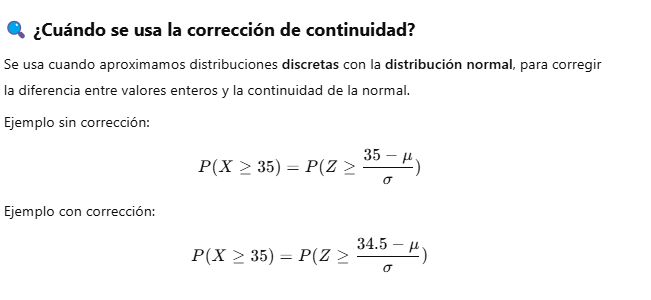

In [54]:
def apply_continuity_correction(k, condition="greater_equal"):
    """
    Aplica la corrección de continuidad para la aproximación normal de una binomial.

    Parámetros:
    - k: el valor discreto en la distribución binomial.
    - condition: tipo de probabilidad a calcular.
        - "greater_equal" (P(X ≥ k)): usa k - 0.5
        - "greater" (P(X > k)): usa k + 0.5
        - "less_equal" (P(X ≤ k)): usa k + 0.5
        - "less" (P(X < k)): usa k - 0.5
        - "between" (P(a ≤ X ≤ b)): usa (a - 0.5, b + 0.5)

    Retorna:
    - Valor corregido (o rango de valores corregidos si es "between").
    """
    if condition == "greater_equal":
        return k - 0.5
    elif condition == "greater":
        return k + 0.5
    elif condition == "less_equal":
        return k + 0.5
    elif condition == "less":
        return k - 0.5
    elif condition == "between":  # Si es entre dos valores, retorna el rango corregido
        return (k[0] - 0.5, k[1] + 0.5)
    else:
        raise ValueError("Condición inválida. Usa: 'greater_equal', 'greater', 'less_equal', 'less', 'between'.")

# Ejemplo de uso:
k = 35
x_corrected = apply_continuity_correction(k, condition="greater_equal")
print(f"X corregido para P(X ≥ {k}): {x_corrected}")


X corregido para P(X ≥ 35): 34.5


# Encontrar el valor de un numero de la tabla normal


In [55]:
from scipy.stats import norm

# Valor de Z dado
z = 0.9825  # Puedes cambiar este valor

# Calcular la probabilidad acumulada P(Z ≤ z)
probability = norm.cdf(z)

print(f"P(Z ≤ {z}) es aproximadamente {probability:.4f}")


P(Z ≤ 0.9825) es aproximadamente 0.8371
